<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/Cooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants
gamma = 1.0       # Spontaneous emission rate
eta = 0.1         # Lamb-Dicke parameter
omega = 1.0       # Trap frequency
Omega_values = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0] # Rabi frequencies to test
Delta_range = np.linspace(-5, 5, 300)  # Detuning values

def compute_u_y(Delta, Omega, gamma, nu):
    # Steady-state Bloch vector components
    P = gamma**2 + Delta**2 + (Omega**2)/2
    sx = -Delta * Omega / P
    sy = gamma * Omega / P
    sz = -Omega**2 / (2 * P)

    # Compute RHS of modified Bloch equations
    rhs = np.array([
        -sy * 0 - 1j * sz,    # -Tr[sigma_y * rho_ss * sigma_x]
        -sy * 1,              # -Tr[sigma_y * rho_ss * sigma_y]
        -sy * 0 + 1j * sx,    # -Tr[sigma_y * rho_ss * sigma_z]
        -1j * sy              # -Tr[sigma_y * rho_ss * Id]
    ])

    # Coefficient matrix from modified Bloch equations
    A = np.array([
        [-gamma + 1j * nu, Delta,          0,       0],
        [-Delta,           -gamma + 1j * nu, -Omega, 0],
        [0,                Omega,         -2*gamma + 1j * nu, -2*gamma],
        [0,                0,             0,       1j * nu]
    ], dtype=complex)

    # Solve for u_x, u_y, u_z, u_Id
    u = solve(A, rhs)

    return np.real(u[1])  # Return Re[u_y]


# Compute S(nu) for each Omega and detuning
results = {}

for Omega in Omega_values:
    S_nu = []
    for Delta in Delta_range:
        u_y = compute_u_y(Delta, Omega, gamma, omega)
        S = (eta**2 * Omega**2 / 4) * u_y
        S_nu.append(S)
    results[Omega] = S_nu


for Omega, R_vals in results.items():
    R_vals_float = [float(r) for r in R_vals]  # Convert to plain floats
    print(f"Ω = {Omega}:")
    print(f"  Max R = {max(R_vals_float):.4e}")
    print(f"  Min R = {min(R_vals_float):.4e}")
    print(f"  Sample values: {R_vals_float[:5]}")





Ω = 0.1:
  Max R = 1.1961e-06
  Min R = 3.2885e-09
  Sample values: [4.021914101423756e-09, 4.129805705352313e-09, 4.241374941118748e-09, 4.3567737091487305e-09, 4.476161270576351e-09]
Ω = 0.3:
  Max R = 2.8705e-05
  Min R = 4.3471e-08
  Sample values: [1.0265303770549122e-07, 1.0524809342385295e-07, 1.0792830957593978e-07, 1.1069711480051892e-07, 1.1355810096367598e-07]
Ω = 0.5:
  Max R = 1.1185e-04
  Min R = -6.8100e-09
  Sample values: [4.464100367065997e-07, 4.569083217829243e-07, 4.677337083378725e-07, 4.788988754060005e-07, 4.904170889648315e-07]
Ω = 0.7:
  Max R = 2.3935e-04
  Min R = -8.4781e-07
  Sample values: [1.1426645048748644e-06, 1.167238400376372e-06, 1.1925239125531465e-06, 1.2185470520994343e-06, 1.2453349798671018e-06]
Ω = 1.0:
  Max R = 3.8518e-04
  Min R = -1.9256e-05
  Sample values: [2.9579372745823178e-06, 3.0109618407375032e-06, 3.065258063099013e-06, 3.1208645478128406e-06, 3.1778213418627214e-06]
Ω = 1.5:
  Max R = 9.8788e-06
  Min R = -3.1345e-04
  Sample va

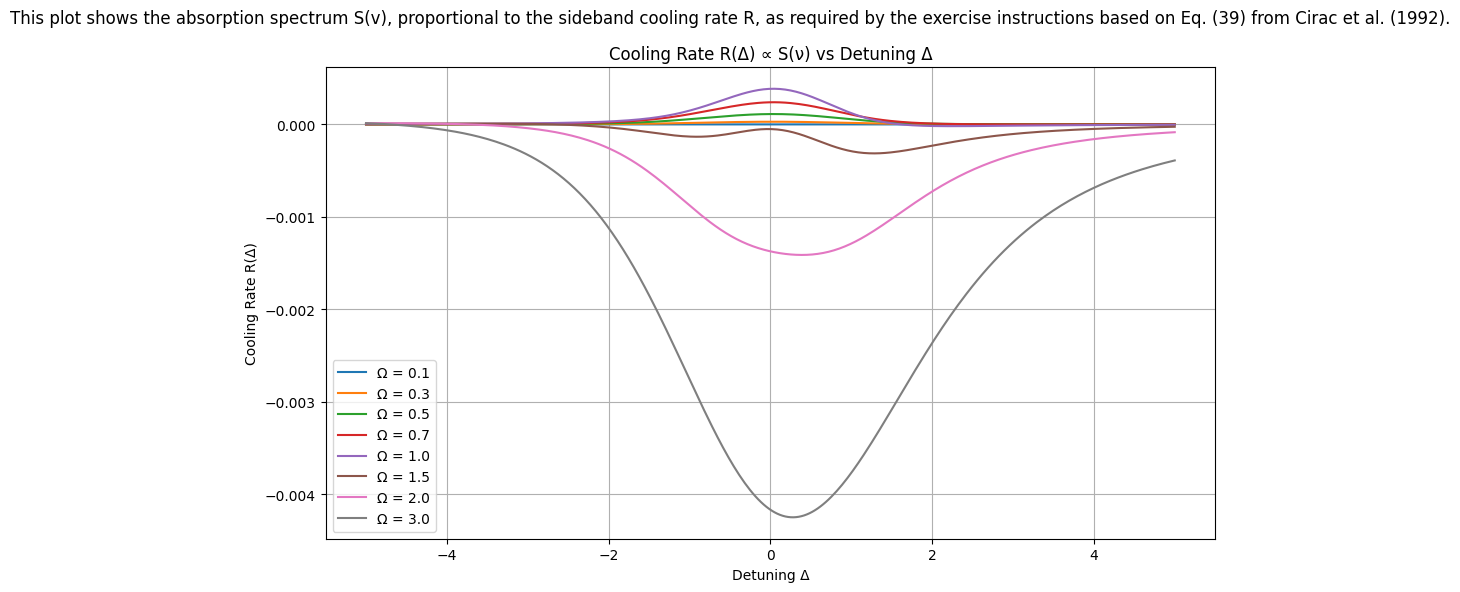

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
for Omega in Omega_values:
    plt.plot(Delta_range, results[Omega], label=f'Ω = {Omega}')

plt.suptitle('This plot shows the absorption spectrum S(v), proportional to the sideband cooling rate R, as required by the exercise instructions based on Eq. (39) from Cirac et al. (1992).')
plt.title('Cooling Rate R(Δ) ∝ S(ν) vs Detuning Δ')
plt.xlabel('Detuning Δ')
plt.ylabel('Cooling Rate R(Δ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants
gamma = 1.0       # Spontaneous emission rate
eta = 0.1         # Lamb-Dicke parameter
omega = 1.0       # Trap frequency
Omega_values = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]  # Rabi frequencies to test
Delta_range = np.linspace(-5, 5, 300)  # Detuning values

def compute_u_y(Delta, Omega, gamma, nu):
    # Steady-state Bloch vector components
    P = gamma**2 + Delta**2 + (Omega**2)/2
    sx = -Delta * Omega / P
    sy = gamma * Omega / P
    sz = -(gamma**2 + Delta**2) / P  # Corrected sz expression

    # Compute RHS of modified Bloch equations
    rhs = np.array([
        -0.5j * sz,          # -Tr[sigma_y * rho_ss * sigma_x] = -0.5i<σ_z>
        -0.5,                # -Tr[sigma_y * rho_ss * sigma_y] = -0.5
        0.5j * sx,           # -Tr[sigma_y * rho_ss * sigma_z] = 0.5i<σ_x>
        -0.5j * sy           # -Tr[sigma_y * rho_ss * Id] = -0.5i<σ_y>
    ], dtype=complex)

    # Coefficient matrix from modified Bloch equations
    A = np.array([
        [-gamma + 1j*nu, Delta, 0, 0],
        [-Delta, -gamma + 1j*nu, -Omega, 0],
        [0, Omega, -2*gamma + 1j*nu, -2*gamma],
        [0, 0, 0, 1j*nu]
    ], dtype=complex)

    # Solve for u_x, u_y, u_z, u_Id
    u = solve(A, rhs)

    return u[1]  # Return u_y (complex valued)

# Compute cooling rate R ∝ S(ν) - S(-ν) for each Omega and detuning
results = {}

for Omega in Omega_values:
    cooling_rates = []
    for Delta in Delta_range:
        # Compute u_y for +ν and -ν
        u_y_pos = compute_u_y(Delta, Omega, gamma, +omega)
        u_y_neg = compute_u_y(Delta, Omega, gamma, -omega)

        # Compute S(ν) and S(-ν)
        S_pos = (eta**2 * Omega**2 / 4) * u_y_pos
        S_neg = (eta**2 * Omega**2 / 4) * u_y_neg

        # Cooling rate is proportional to the difference
        cooling_rate = np.real(S_pos - S_neg)  # Take real part
        cooling_rates.append(cooling_rate)

    results[Omega] = cooling_rates

print(results)

{0.1: [np.float64(3.974021492266511e-07), np.float64(4.0540620973938855e-07), np.float64(4.136251625698474e-07), np.float64(4.220661950913247e-07), np.float64(4.307367809816164e-07), np.float64(4.3964469335411686e-07), np.float64(4.487980185626514e-07), np.float64(4.582051707176201e-07), np.float64(4.6787490695324217e-07), np.float64(4.778163434880127e-07), np.float64(4.880389725229483e-07), np.float64(4.985526800248038e-07), np.float64(5.093677644441904e-07), np.float64(5.204949564214392e-07), np.float64(5.319454395360993e-07), np.float64(5.437308721592213e-07), np.float64(5.558634104709502e-07), np.float64(5.6835573270955e-07), np.float64(5.812210647217475e-07), np.float64(5.944732068882197e-07), np.float64(6.081265625022053e-07), np.float64(6.221961676835383e-07), np.float64(6.36697722914936e-07), np.float64(6.51647626292073e-07), np.float64(6.670630085838882e-07), np.float64(6.829617702046206e-07), np.float64(6.993626202043313e-07), np.float64(7.162851173900482e-07), np.float64(7.3

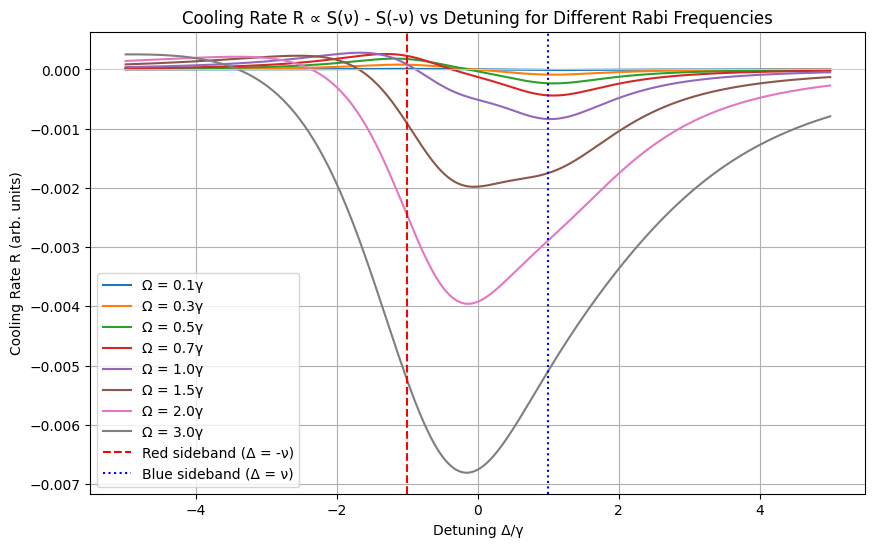

In [24]:
# Plot the results
plt.figure(figsize=(10, 6))
for Omega, rates in results.items():
    plt.plot(Delta_range, rates, label=f'Ω = {Omega}γ')

plt.xlabel('Detuning Δ/γ')
plt.ylabel('Cooling Rate R (arb. units)')
plt.title('Cooling Rate R ∝ S(ν) - S(-ν) vs Detuning for Different Rabi Frequencies')
plt.axvline(x=-omega, color='red', linestyle='--', label='Red sideband (Δ = -ν)')
plt.axvline(x=omega, color='blue', linestyle=':', label='Blue sideband (Δ = ν)')
plt.axhline(y=0, color='yellow', linestyle='-', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()